<a href="https://colab.research.google.com/github/snehachavhan2004/OIBSIP-task-2/blob/main/Unemployment_Analysis_with_Python(task_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as asn
import warnings
warnings.filterwarnings('ignore')

In [57]:
df=pd.read_csv('/content/Unemployment in India.csv')

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.isnull().sum() #to cheak the null values

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


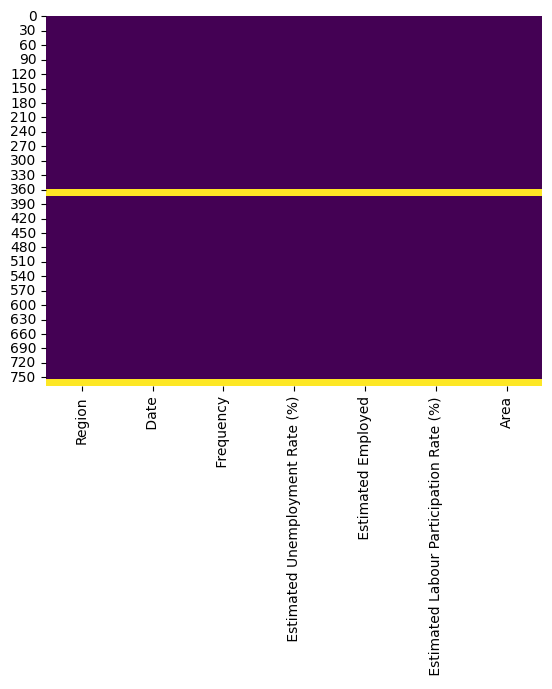

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.show()

In [58]:
num_column=[' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)'] # numerical data
df[num_column]=df[num_column].fillna(df[num_column].mean())

In [59]:
cat_column=['Region',' Date',' Frequency','Area'] #Categorical data
df[cat_column]=df[cat_column].fillna(df[cat_column].mode())
for col in cat_column:
  df[col]=df[col].fillna(df[col].mode()[0])

In [ ]:
df.isnull().sum() #to cheak the null values

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,768.000000,7.680000e+02,768.000000
mean,11.787946,7.204460e+06,42.630122
std,10.523784,7.938986e+06,7.961667
min,0.000000,4.942000e+04,13.330000
25%,4.720000,1.376532e+06,38.265000
50%,9.005000,5.064048e+06,41.430000
75%,15.472500,1.111390e+07,45.362500
max,76.740000,4.577751e+07,72.570000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    768 non-null    object 
 1    Date                                     768 non-null    object 
 2    Frequency                                768 non-null    object 
 3    Estimated Unemployment Rate (%)          768 non-null    float64
 4    Estimated Employed                       768 non-null    float64
 5    Estimated Labour Participation Rate (%)  768 non-null    float64
 6   Area                                      768 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df.shape

(768, 7)

In [22]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df.duplicated().sum()

27

In [60]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(741, 7)

In [ ]:
df.Region.value_counts()

,count
Region,
Andhra Pradesh,29
Kerala,28
West Bengal,28
Uttar Pradesh,28
Tripura,28
Telangana,28
Tamil Nadu,28
Rajasthan,28
Punjab,28


In [ ]:
df.Area.value_counts()

,count
Area,
Urban,382
Rural,359


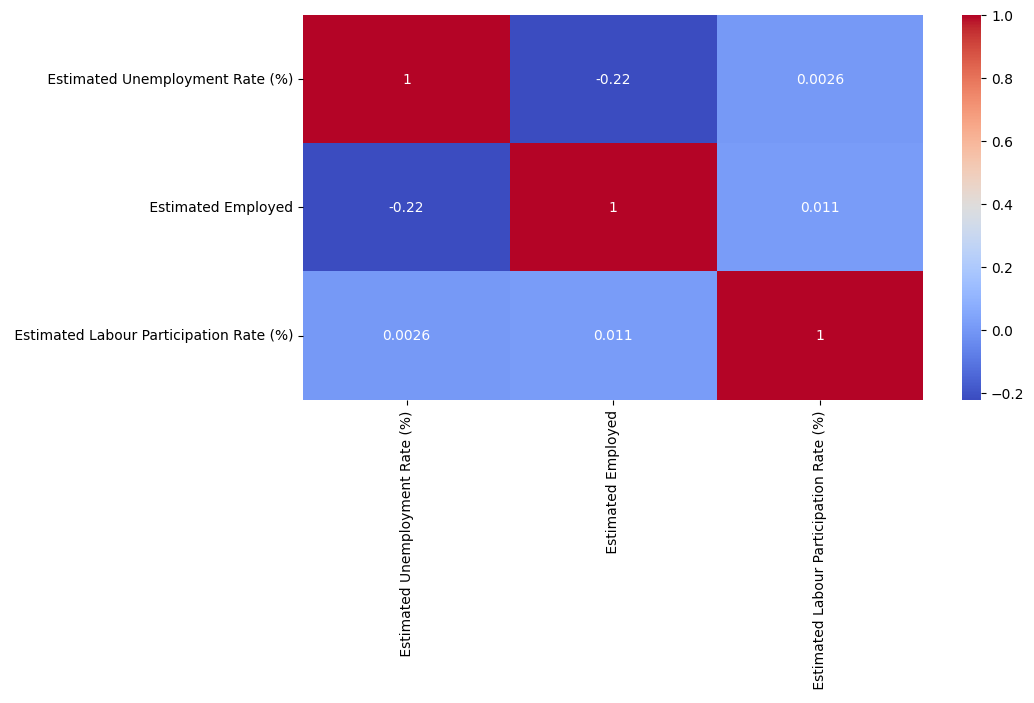

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,cmap='coolwarm') # Only include numerical features for correlation analysis
plt.show()

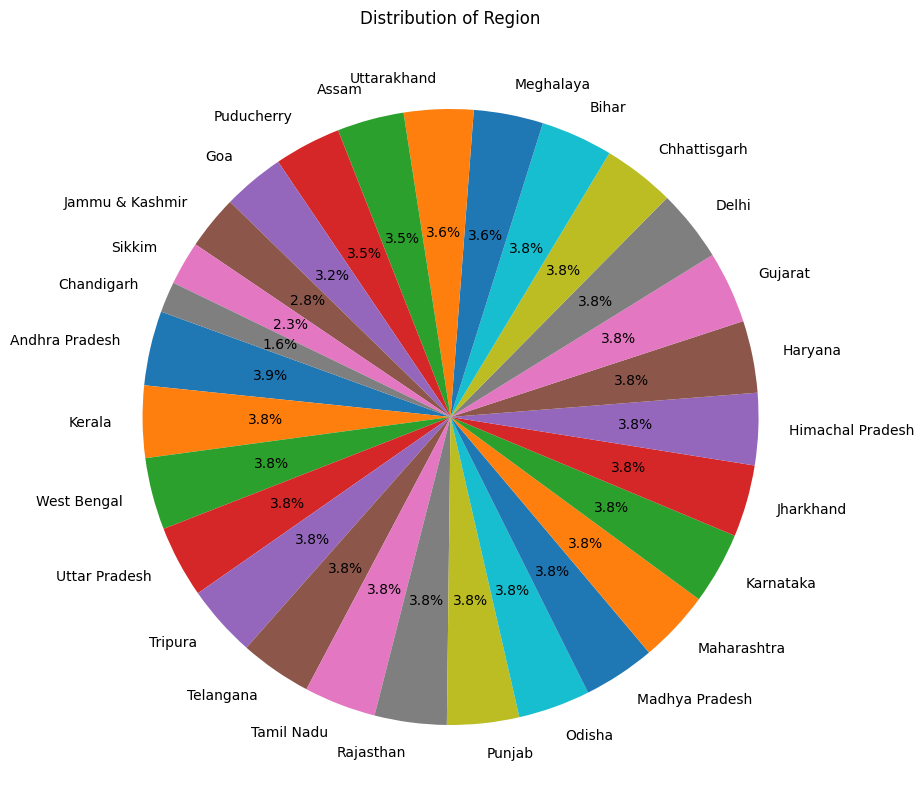

In [ ]:
plt.figure(figsize=(12,10))
region_counts = df['Region'].value_counts()
plt.pie(region_counts,labels=region_counts.index,autopct='%1.1f%%',startangle=160)
plt.title('Distribution of Region')
plt.show()

In [ ]:
ump = df[[' Estimated Unemployment Rate (%)','Region']]
unemp2 = ump.groupby('Region').mean().reset_index()
unemp2 = unemp2.sort_values(' Estimated Unemployment Rate (%)')
fig = px.bar(unemp2, x='Region',y=' Estimated Unemployment Rate (%)',color='Region',title='Average Unemployment Rate in each state')
fig.show()

In [31]:
import plotly.express as px
fig = px.box(df,x='Region',y=' Estimated Unemployment Rate (%)',color='Area',title='Unemployment rate') # Changed 'States' to 'Region' and 'Region' to 'Area'
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [32]:
fig = px.scatter(df,x=' Estimated Unemployment Rate (%)',y=' Estimated Labour Participation Rate (%)',color='Region',title='Unemployment Rate vs. Labour Participation Rate')
fig.show()